In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [41]:
def plot_metrics(metrics_people, metrics_pods, from_ts='min', to_ts='max'):
    metrics_people.set_index = metrics_people["ts"]
    metrics_pods.set_index = metrics_pods["ts"]
    
    if from_ts == 'min':
        from_ts = 0
    if to_ts == 'max':
        to_ts = min(len(metrics_pods), len(metrics_people)) 
    # print(from_ts, to_ts)
    metrics_people = metrics_people[from_ts:to_ts]
    metrics_pods = metrics_pods[from_ts:to_ts]

    fig,axs = plt.subplots(3,2,figsize=(12,16))
    
    # Number of Pods
    axs[0][0].plot(metrics_people["ts"].values, metrics_people["number_of_pods"].values, )
    # axs[0][0].set_title("Number of Pods")
    axs[0][0].set_xlabel("Time in Seconds")
    axs[0][0].set_ylabel("Average Number of Pods")
    axs[0][0].grid()

    # Time
    axs[0][1].stackplot(metrics_people["ts"].values, metrics_people[["time_in_station", "time_in_pods"]].T, labels=["Time in Station", "Time in Pods"])
    axs[0][1].legend(loc="upper left")
    # axs[0][1].set_title("Time in Stations vs Pods")
    axs[0][1].set_xlabel("Time in Seconds")
    axs[0][1].set_ylabel("Combined Average Time Spent")
    axs[0][1].grid()

    #  Meters Traveled
    axs[1][0].plot(metrics_people["ts"].values, metrics_people["meters_traveled"].values, )
    # axs[1][0].set_title("Meters Traveled")
    axs[1][0].set_xlabel("Time in Seconds")
    axs[1][0].set_ylabel("Average Meters Traveled Person")
    axs[1][0].grid()

    # Utilization
    axs[1][1].plot(metrics_pods["ts"].values, metrics_pods["utilization"].values, )
    # axs[0][0].set_title("Number of Pods")
    axs[1][1].set_xlabel("Time in Seconds")
    axs[1][1].set_ylabel("Average Utilization of Pods")
    axs[1][1].grid()

    # Time
    axs[2][0].stackplot(metrics_pods["ts"].values, metrics_pods[["time_in_station", "time_in_queue", "time_driving"]].T, labels=["Time in Station", "Time in Queue", "Time Driving"])
    axs[2][0].legend(loc="upper left")
    # axs[0][1].set_title("Time in Stations vs Pods")
    axs[2][0].set_xlabel("Time in Seconds")
    axs[2][0].set_ylabel("Combined Average Time Spent")
    axs[2][0].grid()

    # Meters Traveled
    axs[2][1].plot(metrics_pods["ts"].values, metrics_pods["meters_traveled"].values, )
    # axs[1][0].set_title("Meters Traveled")
    axs[2][1].set_xlabel("Time in Seconds")
    axs[2][1].set_ylabel("Average Meters Traveled Pod")
    axs[2][1].grid()

In [57]:
def calc_metrics(metrics_people, metrics_pods, from_ts='min', to_ts='max'):
    metrics_people.set_index = metrics_people["ts"]
    metrics_pods.set_index = metrics_pods["ts"]
    
    if from_ts == 'min':
        from_ts = 0
    if to_ts == 'max':
        to_ts = min(len(metrics_pods), len(metrics_people)) 
    # print(from_ts, to_ts)
    metrics_people = metrics_people[from_ts:to_ts]
    metrics_pods = metrics_pods[from_ts:to_ts]

    m_avg_per_s_people = metrics_people["meters_traveled"].iloc[-1] / len(metrics_people)
    m_abs_avg_people = metrics_people["meters_traveled"].iloc[-1]
    m_avg_per_s_pods = metrics_pods["meters_traveled"].iloc[-1] / len(metrics_pods)
    m_abs_avg_pods = metrics_pods["meters_traveled"].iloc[-1]
    ration_m_avg_per_s_person_to_m_avg_per_s_pod = m_avg_per_s_people / m_avg_per_s_pods
    wr_avg = metrics_people["time_in_station"].iloc[-1] / len(metrics_people)
    mr_avg = 1 - metrics_people["time_in_station"].iloc[-1] / len(metrics_people)
    ur_avg = metrics_pods["utilization"].sum() / len(metrics_pods)

    return (round(m_avg_per_s_people, 2), 
            round(m_abs_avg_people), 
            round(m_avg_per_s_pods, 2),
            round(m_abs_avg_pods),
            round(ration_m_avg_per_s_person_to_m_avg_per_s_pod, 2), 
            round(wr_avg, 2), 
            round(mr_avg, 2), 
            round(ur_avg, 2))

# Gather Metrics for Thesis

## Startup Skript

```bash
conc
    spawn pods fill s1+-
    <&>
    spawn pods fill s2+-
    <&>
    spawn pods fill u1+-
    <&>
    spawn pods fill u2+-
    <&>
    spawn pods fill u3
    <&>
    spawn pods fill u4+-
    <&>
    spawn pods fill u5+-
    <&>
    spawn pods fill t11+-
    <&>
    spawn pods fill t12+-
endconc

sleep $(60 * 60) sim # wait 1 hour before gathering metrics

gather

sleep $(60 * 60 * 5) sim # 5 hours of data

dump people --avg
dump pods --avg
dump config

kill
```

## Used Config (X and Y change over the 4 Experiments)

```yaml
general:
  environment: gather
  town: "benjamintown"
  mode: "visual" 
  override: true 
  command_on_start: "run config/benjamintown/scripts/benchmark.pf"
visual:
  vsync: true
logic:
  number_of_people: 5000
  pod_capacity: X
  line_pods_per_hour: Y
  station_pods_per_hour: 60
  speed_multiplier: 50
  transition_time: 60
  pod_in_station_seconds: 40
  shuffle_people: true
  use_earth_coordinates: false
  distance_factor: 1000

```

## First the Combination of 6 Pods per hour and 300 People Capacity

(6.44, 115833, 12.12, 0.53, 0.5, 0.5, 0.19)

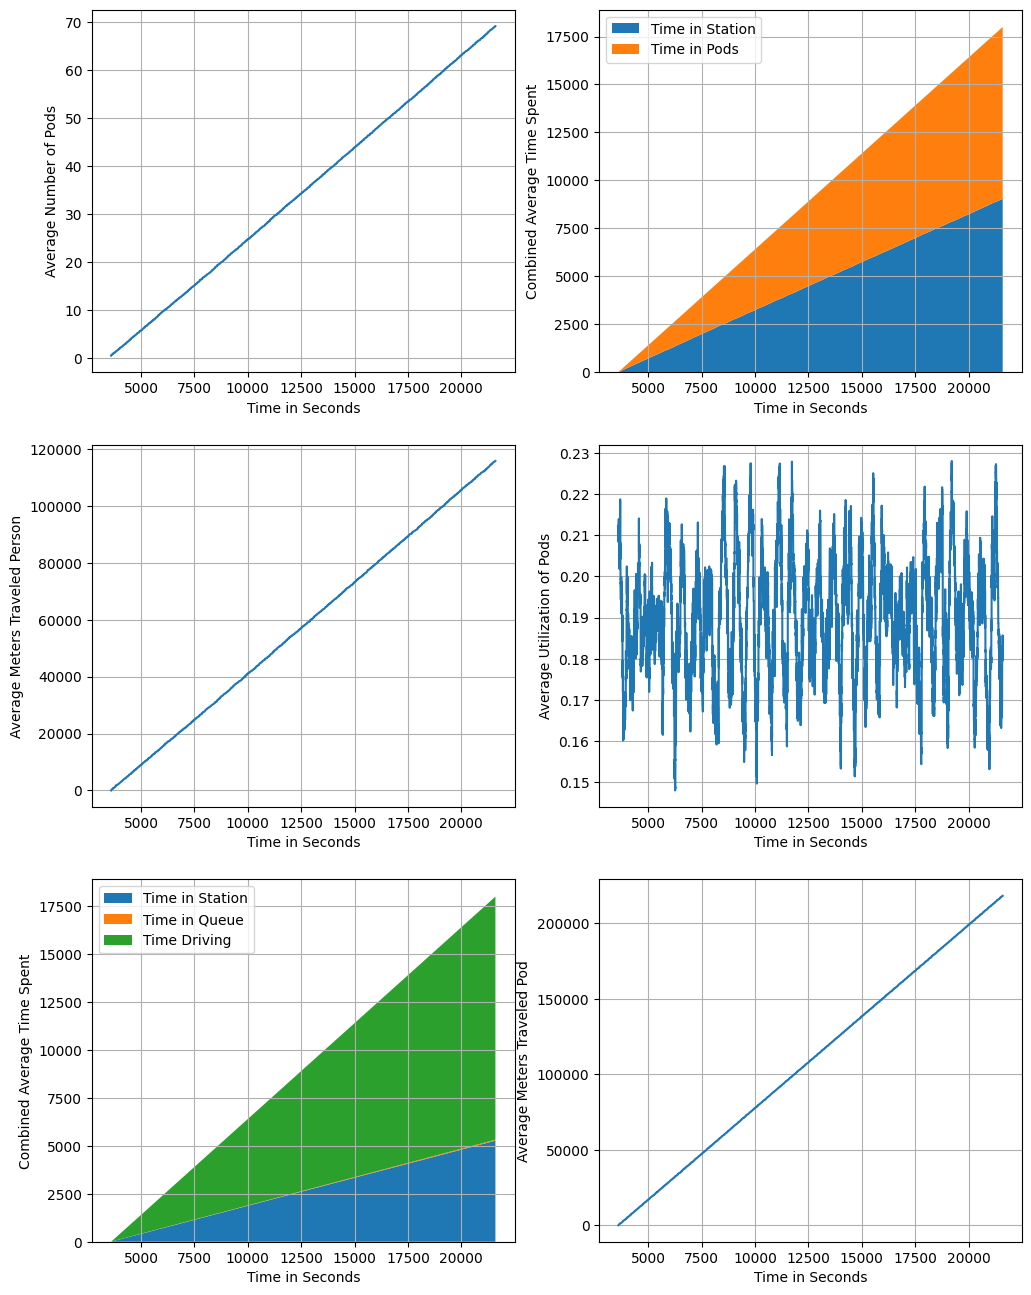

In [58]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_12:58/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_12:58/pods/avg.txt")
plot_metrics(people_avg_metrics, pods_avg_metrics)
calc_metrics(people_avg_metrics, pods_avg_metrics)

## Now the Combination of 12 Pods per hour and 150 People Capacity

(8.02, 144369, 12.05, 0.67, 0.38, 0.62, 0.25)

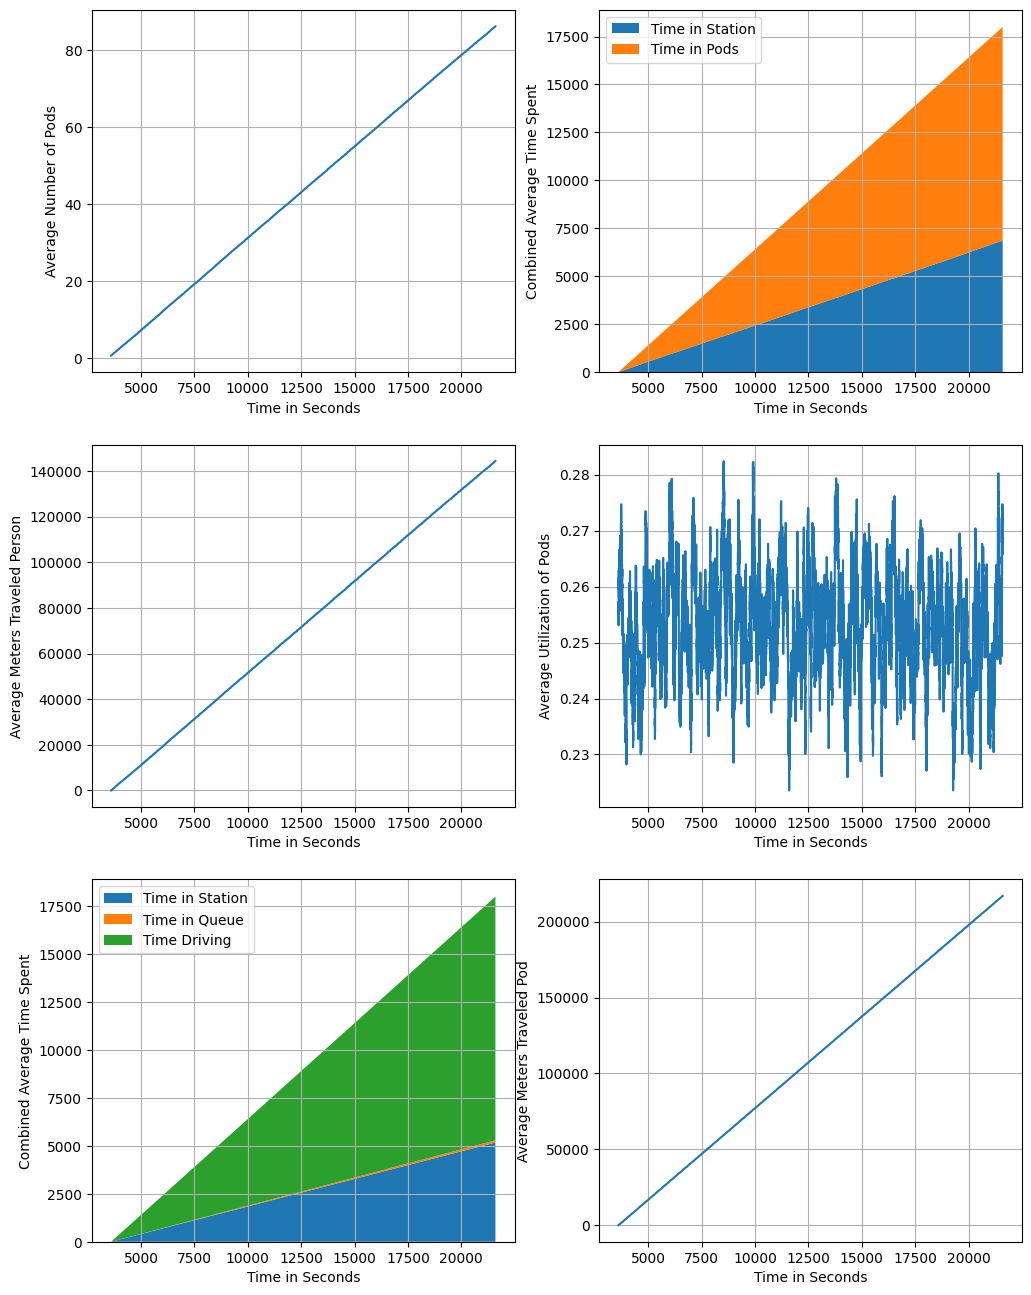

In [59]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_12:15/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_12:15/pods/avg.txt")
plot_metrics(people_avg_metrics, pods_avg_metrics)
calc_metrics(people_avg_metrics, pods_avg_metrics)

## Next the Combination of 24 Pods per hour and 75 People Capacity

(8.79, 158196, 11.42, 0.77, 0.3, 0.7, 0.28)

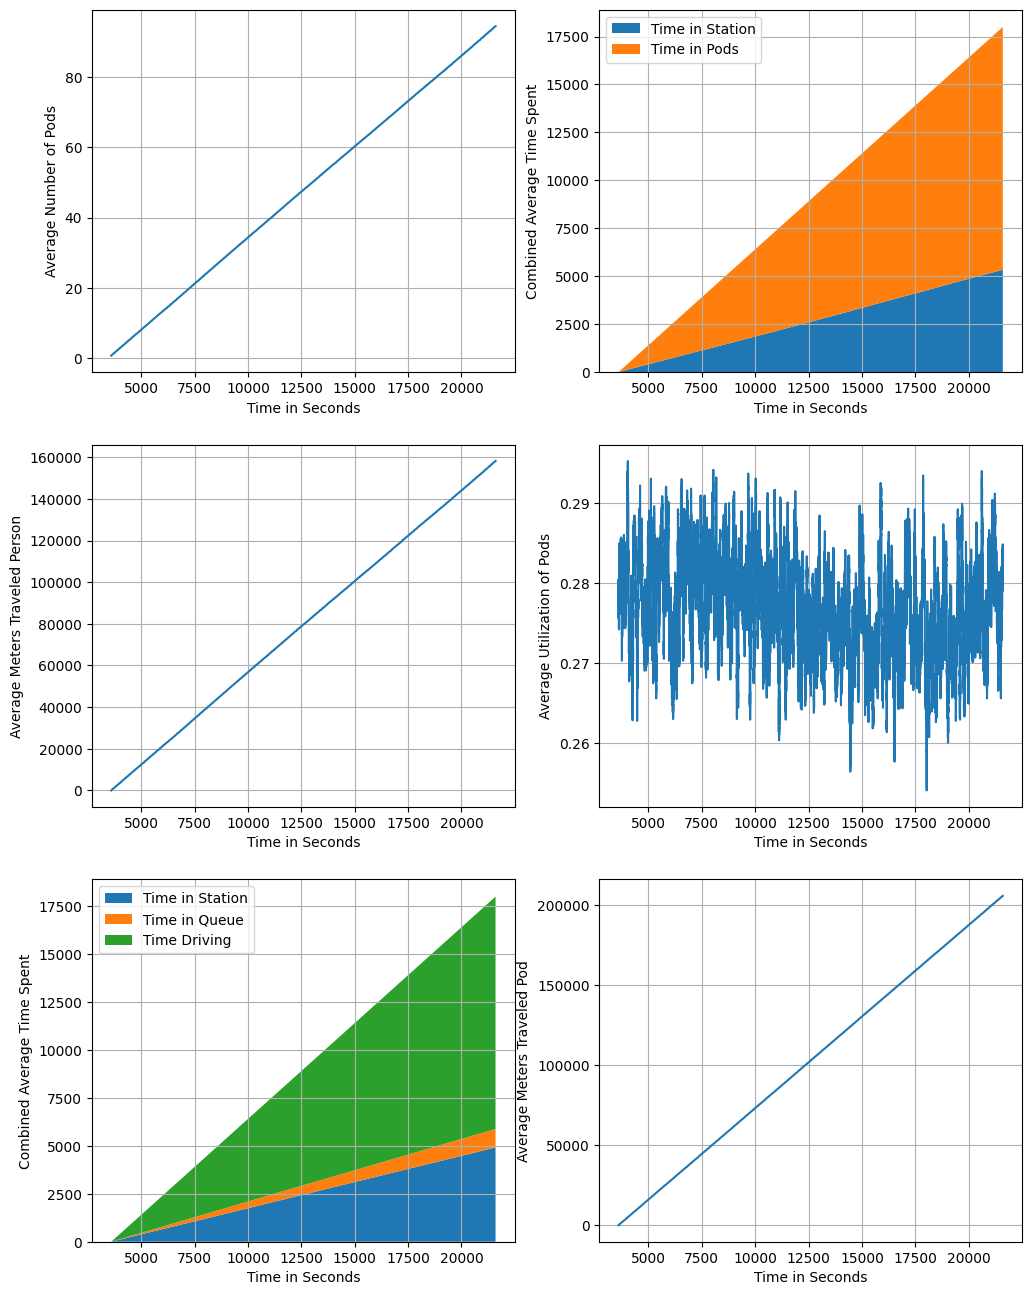

In [60]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_12:24/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_12:24/pods/avg.txt")
plot_metrics(people_avg_metrics, pods_avg_metrics)
calc_metrics(people_avg_metrics, pods_avg_metrics)

## Last the Combination of 30 Pods per hour and 60 People Capacity

(7.28, 130999, 10.58, 0.69, 0.36, 0.64, 0.25)

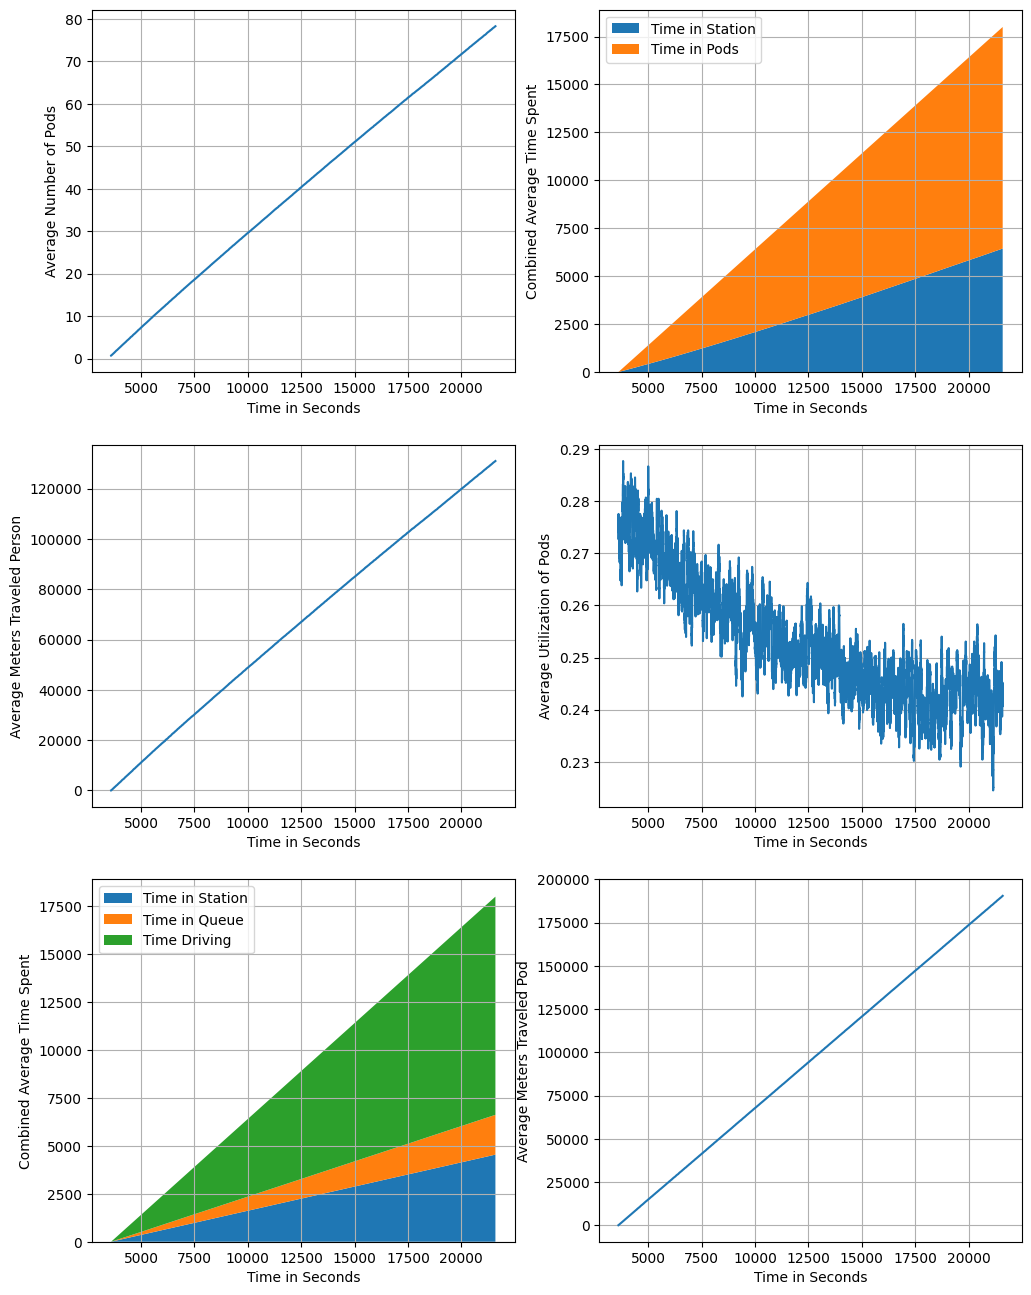

In [61]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_12:47/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_12:47/pods/avg.txt")
plot_metrics(people_avg_metrics, pods_avg_metrics)
calc_metrics(people_avg_metrics, pods_avg_metrics)

## For good measure the Combination of 40 Pods per hour and 45 People Capacity -> Not included in the Thesis

(5.78, 104098, 9.16, 0.63, 0.36, 0.64, 0.25)

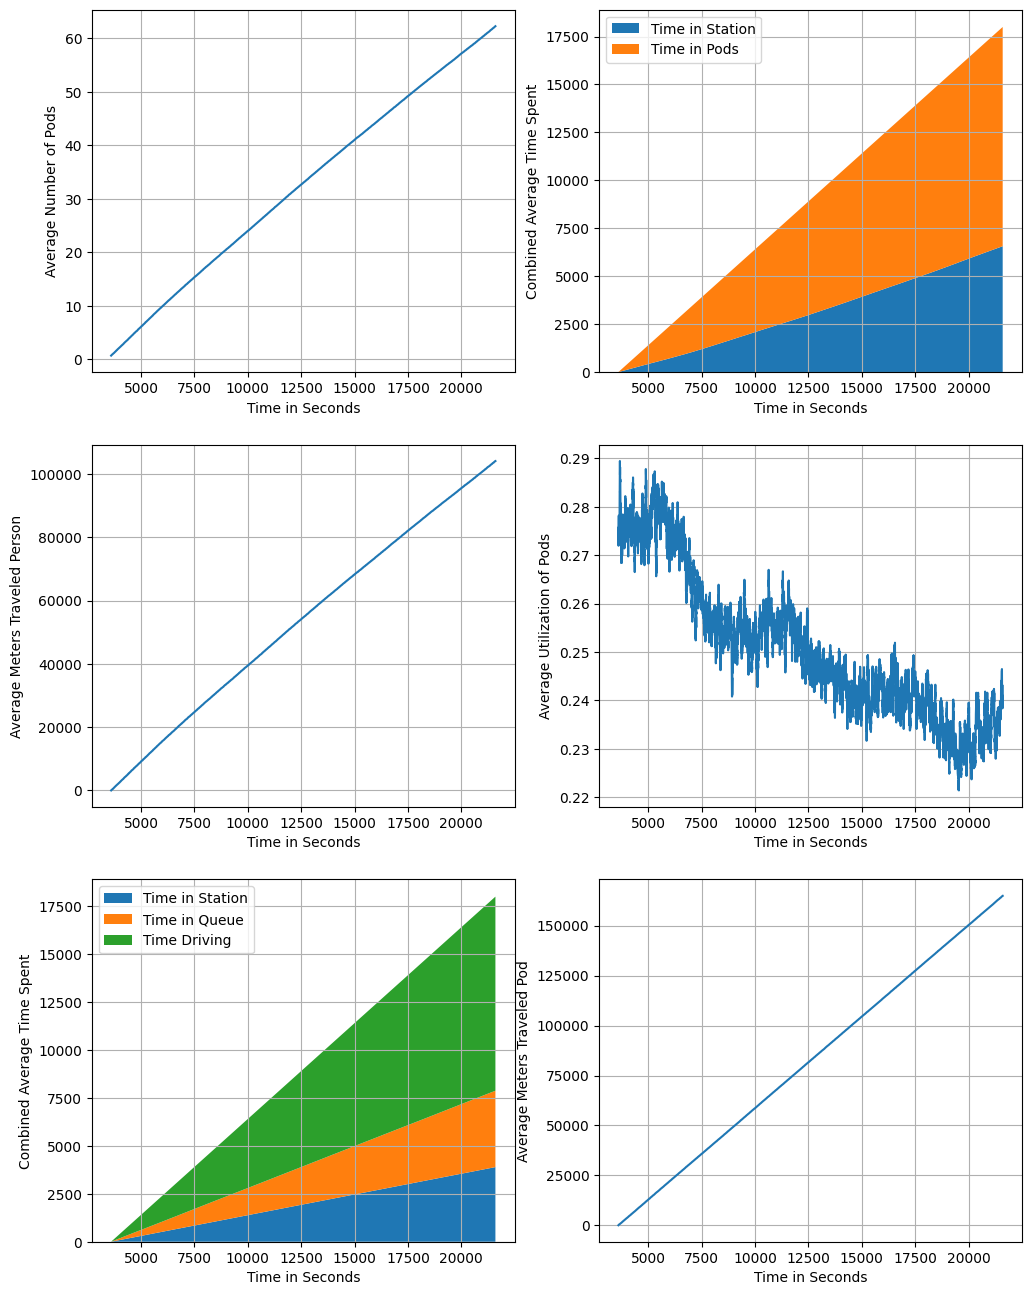

In [62]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_14:04/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/gather/2022.09.27_14:04/pods/avg.txt")
plot_metrics(people_avg_metrics, pods_avg_metrics)
calc_metrics(people_avg_metrics, pods_avg_metrics)